# Wine K-Means Clustering

![](https://lh3.googleusercontent.com/proxy/tcP2OagZAOEdGKcssJl_o_zwPoLeoheTCTeZhyjZ5FczNDphYiVrwaQ-h3PJ3iZy_Fs1pYHrm-Ndgytjn0Je6YmbBrbasuP5XMWop1zb6eE)

## Problem

In this Kaggle Notebook we would try to answer the following question: **given the diferent attributes of several wines, could we succesfully create clusters of them to extract key information that defines them?**

## Proposed Solution

We would use **K-Means** and **Principal Component Analysis** in order to cluster our different wines in three distinct groups. 

## Importing Libraries and Packages

### Visualization

* Matplotlib
* Seaborn

### Data Processing
* Numpy
* Pandas

### Regression
* Sklearn

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans, k_means
import seaborn as sns 
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/wine-customer-segmentation/Wine.csv


## Exploratory Analysis

Importing the data, taking a look a the values we would be working with, and finding whether there are any null values in the dataset.

In [2]:
df=pd.read_csv('../input/wine-customer-segmentation/Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
df.drop('Customer_Segment', axis=1, inplace=True)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Looking at **basic statistical details** about the attributes in our dataset and a pairplot with some of them. 

In [5]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


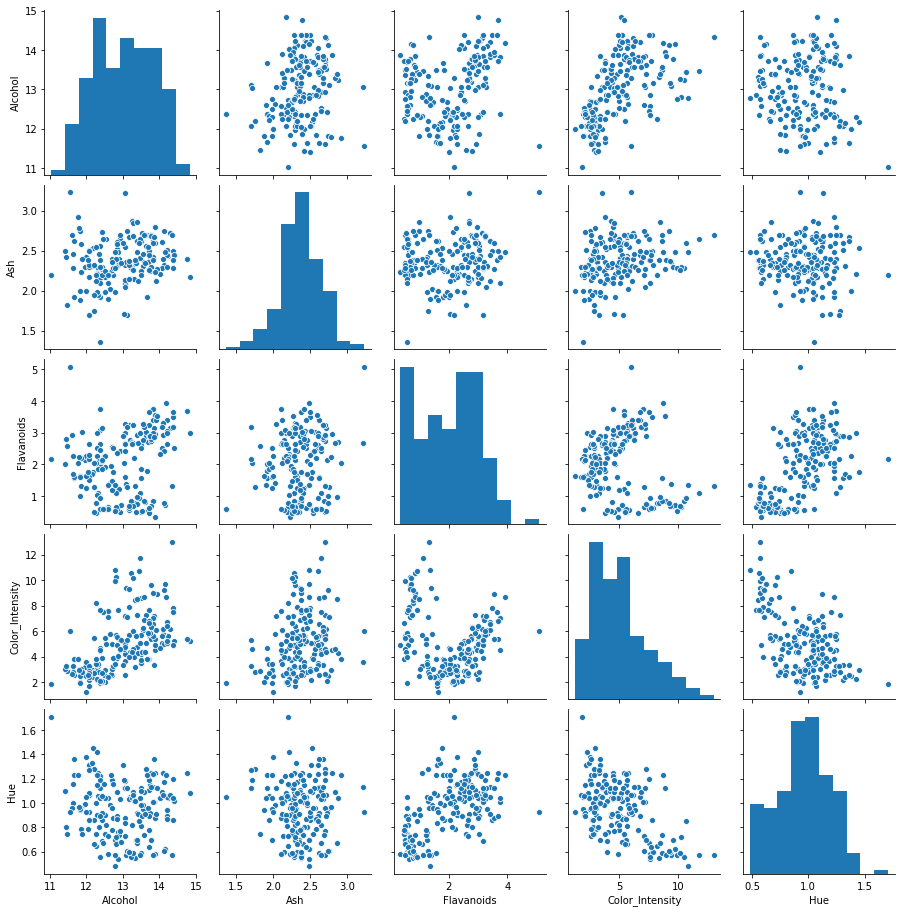

In [6]:
dfPair=df[['Alcohol','Ash','Flavanoids','Color_Intensity','Hue']]
sns.pairplot(dfPair)

## Modeling

**Normalizing our data of independent variables** with the StandardScaler function of Sklearn

In [7]:
from sklearn.preprocessing import StandardScaler
x = df.values[:,1:]
x = np.nan_to_num(x)
clust = StandardScaler().fit_transform(x)

In [8]:
clustdf = pd.DataFrame(clust)
clustdf.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [9]:
x_train=clustdf.values
x_train


array([[-0.5622498 ,  0.23205254, -1.16959318, ...,  0.36217728,
         1.84791957,  1.01300893],
       [-0.49941338, -0.82799632, -2.49084714, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.02123125,  1.10933436, -0.2687382 , ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.74474449, -0.38935541,  0.15166079, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.22769377,  0.01273209,  0.15166079, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.58316512,  1.36520822,  1.50294326, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [10]:
from sklearn.decomposition import PCA
n_comps=x_train.shape[1]

pca=PCA(n_components=n_comps, random_state=684)
X_r=pca.fit(x_train).transform(x_train)

total_variance=sum(pca.explained_variance_)
print('The Total Variance is:',total_variance)
var95=total_variance*0.95
print('95% Variance:',var95)

compsVar=zip(range(0,n_comps),pca.explained_variance_)
compsVar=pd.DataFrame(compsVar,columns=["PCA Comp","Explained Variance"])


The Total Variance is: 12.067796610169497
95% Variance: 11.46440677966102


As we are striving for **95% explained variance**, we select the closer numbers of components that would take us 11.46. In our case, **7 components would do just right**.

In [11]:
aev=[]
for i in range(0,12):
    if i<1:
        aev.append(compsVar['Explained Variance'][0])    
    else:
        aev.append(sum(compsVar['Explained Variance'][0:i+1]))      
        
compsVar['Accumulative Explained Variance']=aev
compsVar

,PCA Comp,Explained Variance,Accumulative Explained Variance
0,0,4.659656,4.659656
1,1,2.037184,6.696840
2,2,1.372900,8.069739
3,3,0.924000,8.993740
4,4,0.800858,9.794598
5,5,0.612802,10.407400
6,6,0.551821,10.959221
7,7,0.329921,11.289142
8,8,0.258175,11.547317
9,9,0.233789,11.781105


Calculating the **inertia scores** for different numbers of clusters

In [12]:
pca=PCA(n_components=7, random_state=684)
X_r=pca.fit(x_train).transform(x_train)

some_clusts=[]
for r in range(2,30):
    some_clusts.append(r)

inertia=[]
f=[]
for f in some_clusts:
    kmeans=KMeans(n_clusters=f,random_state=21)
    kmeans=kmeans.fit(X_r)
    i=kmeans.inertia_
    inertia.append(i)

In [13]:
inertiaClust=zip(some_clusts,inertia)
inertiaClust=pd.DataFrame(inertiaClust,columns=["Clusters","Inertia Scores"])
inertiaClust.head()

,Clusters,Inertia Scores
0,2,1285.537304
1,3,992.360075
2,4,908.560270
3,5,839.830776
4,6,792.184551


Now, we are plotting the inertia score each numbers of clusters have. As we can see, **the changes in inertia slows down when the number of clusters equals to three**. Which will be the quantity of clusters to be used from this point onwards. 

Text(0.5, 1.0, 'Inertia Score per Cluster')

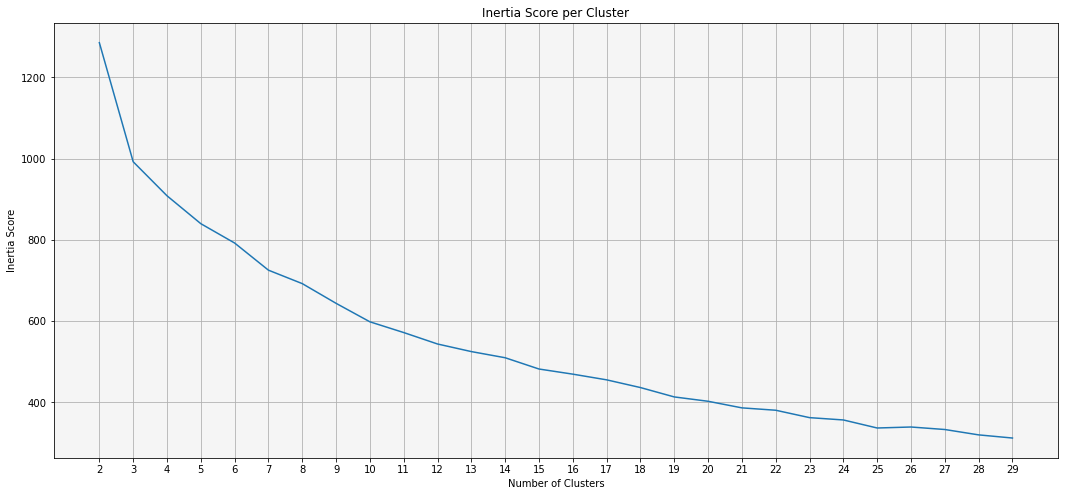

In [14]:
fig,(ax1)=plt.subplots(1,figsize=(18,8))
xx=np.arange(len(some_clusts))
ax1.plot(xx,inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(some_clusts)
ax1.grid(True)
ax1.set_facecolor('whitesmoke')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.title('Inertia Score per Cluster')

Now, it's time to cluster our wines.

In [15]:
clustering=KMeans(n_clusters=3,random_state=484)
clustering.fit(X_r)
df["Cluster"]=clustering.labels_
df.sample(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
116,11.82,1.47,1.99,20.8,86,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495,2
121,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465,0
84,11.84,0.89,2.58,18.0,94,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520,2
18,14.19,1.59,2.48,16.5,108,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680,0
136,12.25,4.72,2.54,21.0,89,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720,1


**Reducing our components into two** so we can plot them with Matplotlib

In [16]:
pca=PCA(n_components=2, random_state=684)
X_r=pca.fit(x_train).transform(x_train)

compstempdf=pd.DataFrame(data=X_r,columns=["Comp_1", "Comp_2"])
compsdf=pd.concat([compstempdf,df[["Cluster"]]],axis=1)
compsdf.sample(5)


,Comp_1,Comp_2,Cluster
137,3.915863,-0.833812,1
46,-2.469129,-0.631872,0
84,-1.099125,0.606236,2
50,-3.199566,-0.159679,0
72,0.739615,1.544637,2


Finally, **our wines are now clustered in three distinct groups** that we can see in the following plot.

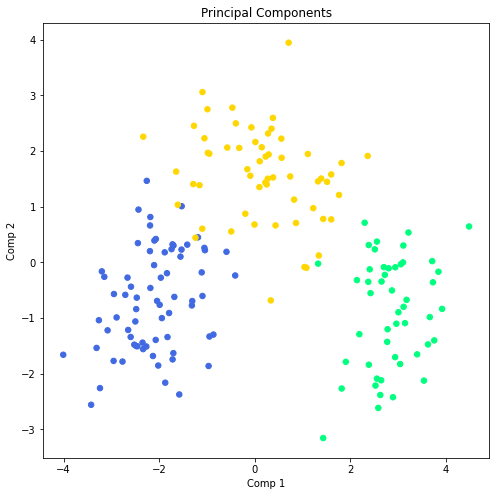

In [17]:
fig=plt.figure(figsize=(8,8))
ax2=fig.add_subplot(1,1,1)
ax2.set_title("Principal Components")
ax2.set_xlabel("Comp 1")
ax2.set_ylabel("Comp 2")
color_theme=np.array(["royalblue","springgreen","gold"])
ax2.scatter(x=compsdf.Comp_1,y=compsdf.Comp_2,c=color_theme[compsdf.Cluster],s=30)
plt.show()